In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
bert_profile_res = pd.read_csv('profile_res/profiling_bert_res.csv')
gpt2_profile_res = pd.read_csv('profile_res/profiling_gpt2_res.csv')
bart_profile_res = pd.read_csv('profile_res/profiling_bart-base_res.csv')

In [16]:
# Plot the average latency distribution of each layer
def plot_layer_latency(
    profile_res: pd.DataFrame, 
    model_name: str, 
    save_file: str = None,
    color: str = 'skyblue',
):
    # Assuming you have the DataFrame loaded as df
    averages = profile_res.mean()

    # Plotting
    plt.figure(figsize=(15, 6))
    averages.plot(kind='bar', color=color, width=0.5)
    # Also plot line graph
    plt.plot(averages, color='black', linestyle='-', linewidth=2,)
    
    plt.ylabel('Average Latency (seconds)', fontdict={'fontsize': 12})
    plt.xlabel('Layer', fontdict={'fontsize': 12})
    plt.title(f'Average Inference Latency per Layer for {model_name}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    if save_file:
        plt.savefig(save_file, bbox_inches='tight')
    plt.show()

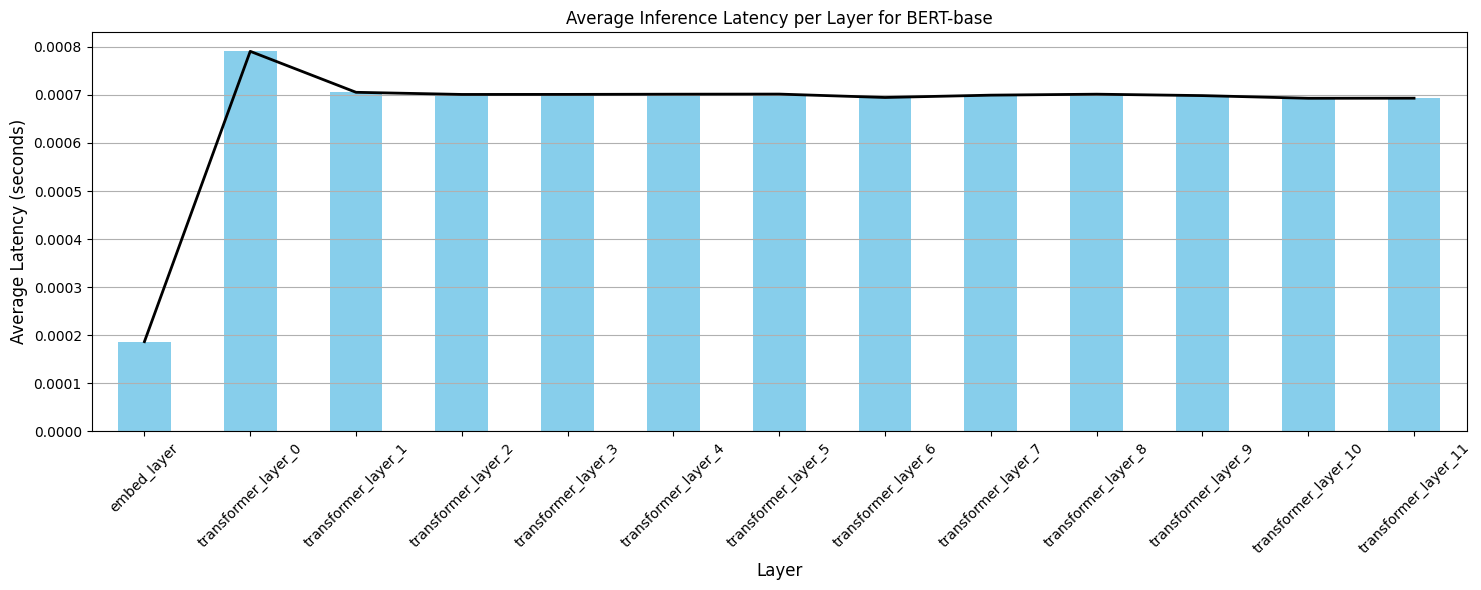

In [17]:
if not os.path.exists('figures'):
    os.makedirs('figures')

plot_layer_latency(bert_profile_res, 'BERT-base', 'figures/bert_layer_latency.pdf')

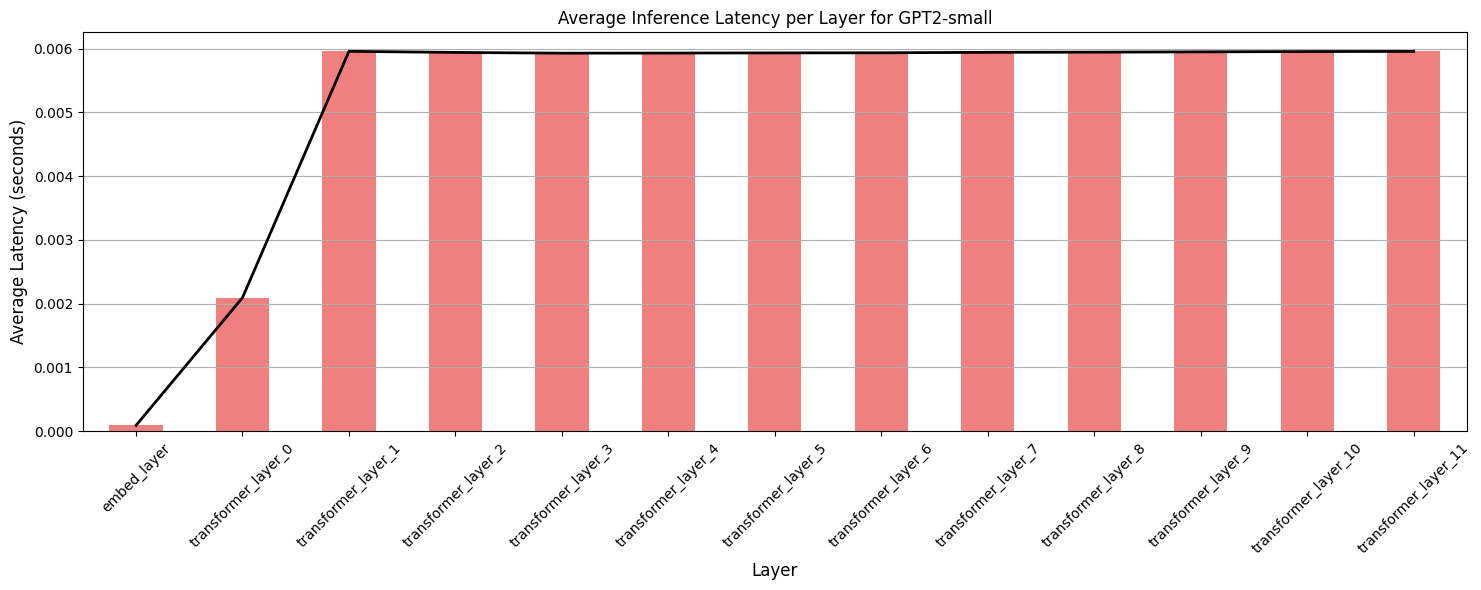

In [18]:
plot_layer_latency(gpt2_profile_res, 'GPT2-small', 'figures/gpt2_layer_latency.pdf', color='lightcoral')

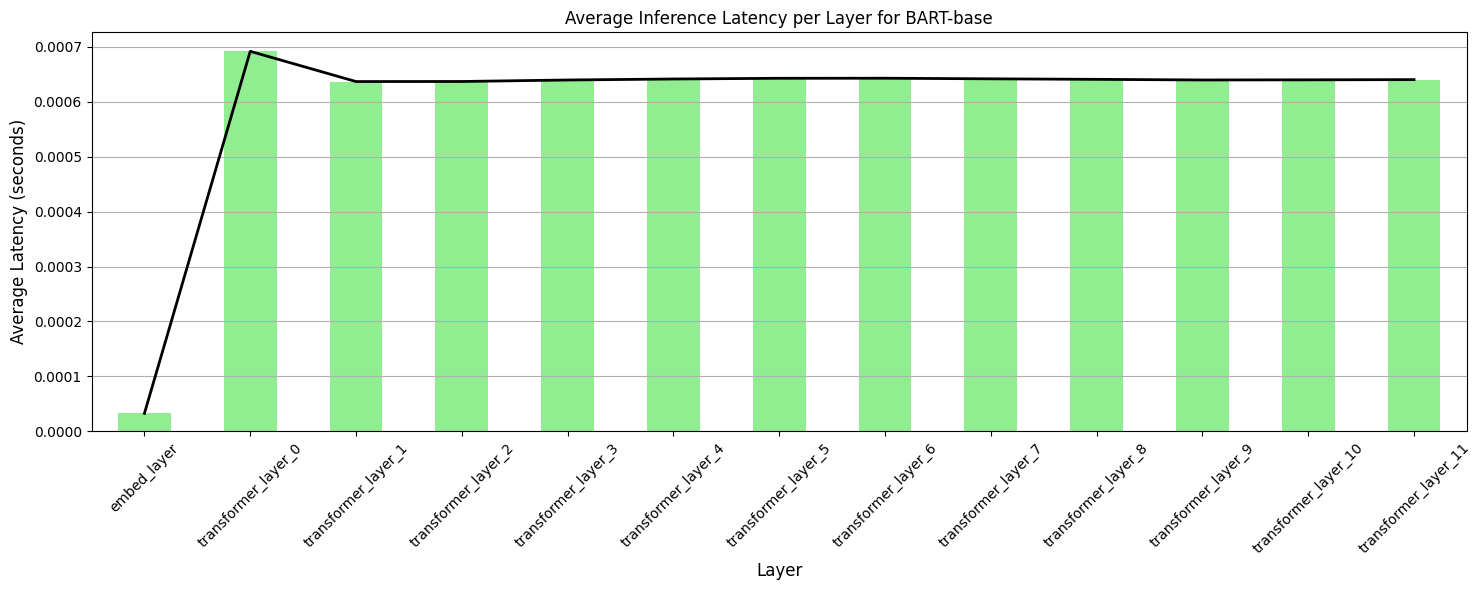

In [19]:
plot_layer_latency(bart_profile_res, 'BART-base', 'figures/bart_layer_latency.pdf', color='lightgreen')